# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [3]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1137,728046963732717569,NaN,NaN,2016-05-05 02:21:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Raymond. He controls fountains with hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728046963...,11,10,Raymond,None,None,None,None
1575,687476254459715584,NaN,NaN,2016-01-14 03:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Curtis. He's a fluffball. 11/10 would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,None,None,pupper,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
rq = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
rq.status_code

200

In [6]:
content = rq.content.decode('utf-8')
lines = content.split('\n')
data = [line.split('\t') for line in lines]
image_predictions = pd.DataFrame(data[1:], columns=data[0])

In [7]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1885,847842811428974592,https://pbs.twimg.com/media/C8QkidrVYAQXQh7.jpg,1,Bernese_mountain_dog,0.9513370000000001,True,Greater_Swiss_Mountain_dog,0.0168491,True,Appenzeller,0.0108492,True
321,671855973984772097,https://pbs.twimg.com/media/CVLpciDW4AAleh-.jpg,1,chimpanzee,0.636031,False,gorilla,0.09875149999999999,False,fountain,0.0317555,False


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [9]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [10]:
# This helper code has been provided by a Udacity instructor. However, Twitter will not give me enough access, so I will use 
# the tweet_json.txt file provided by Udacity. I have commented out this code cell so it won't erroneously execute.
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [11]:
# Load tweet_json.txt into a dataframe. Use code provided by instructor in Knowledge, as the JSON file fails to load with
# pandas read_csv and read_json methods.
tweet_json = pd.DataFrame(columns = ['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as df:
    for line in df:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        tweet_json = tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
tweet_json = tweet_json.reset_index(drop=True)
tweet_json.sample(2)

,tweet_id,retweet_count,favorite_count
2317,666447344410484738,23,107
1654,683357973142474752,1059,3238


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [12]:
twitter_archive.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
576,800859414831898624,8.008580e+17,291859009.0,2016-11-22 00:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@SkyWilliams doggo simply protecting you from ...,NaN,NaN,NaN,NaN,11,10,None,doggo,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.0161992,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279399999999995,True,fur_coat,0.0544486,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.08208610000000001,True


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id    2076 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.7+ KB


In [18]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [19]:
tweet_json.sample(2)

,tweet_id,retweet_count,favorite_count
2180,668992363537309700,381,802
100,872668790621863937,31,0


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


### Quality issues
1. (Programatic) twitter_archive.timestamp needs converted from object class to datetime class. This can make it easier to order by date to remove rows from after August 1st, 2017. Then drop these rows from the dataframe as there are no pictures avaiable for them.

2. (Visual) The columns twitter_archive named in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp all have very few non-null values. These need to be excluded for ease of visual inspection, as they will likely not be needed in analysis and missing values cannot be replaced or located.

3. (Programatic) In image_predictions, p1_conf, p2_conf and p3_conf all are of type object. These should be converted to type float in order to do calculations or visualizations.

4. (Visual) After data type conversion to float, the raw values of the same column image_predictions (p1_conf, p2_conf and p3_conf) should be rounded for ease of visual inspection and calculation. I will assume 5 significant figures are adequate for the confidence interval values, as this is a common convention in high-precision scientific calculations. This will be balanced by giving enough decimal places to the very small numbers.

5. (Programatic) In tweet_json, all the categories are of type object. Everything exepct tweet_id will need made type int before they can be merged with the twitter_archive table. This will also enable insights based on the retweet and favorited counts.

6. (Programatic) In image_predictions, tweet_id is listed as data type int. The former should be changed to enable mering with twitter_archive and tweet_json.

7. (Programatic and Visual) In twitter_archive.rating_denominator, most values are 10, but several are from values that are not 10, with some values all the way up to 170! Given the rating system is given as "X out of 10" as a score for the tweets, the denominator shluld be reset to 10 in every row.

8. (Programatic and Visual) In twitter_archive.rating_numerator, most of the values for the numerators are from 10 to 13. However, there a good handful of values (including 0) that are present. Using an approach like a loop to add 10 to these less-than-10 values will be used to bring the values up to polling expectation. I am assuming that the value is meant to be "10 + X" of the given value, but this is my best common-sense guess only. Lastly, there are some values that have large vlues, but these will be left alone, as I have no insight into their truthfulness. Some of the highest values, such as 1776, are rare and can be ignored and handled during visualization if needed.

9. (Visual) As per the project description, I will need to remove retweets in order to not have them skew my analysis. This will be done with assignment of nun-null values as recommended by a Udacity reviewer. Use pandas .isnull() function to assign only values from the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. Rows that contain data in these columns are retweets and must be removed from the twitter_archive_clean dataset so as to not skew analysis.

### Tidiness issues

1. (Visual and Programatic) tweet_json and image_predictions should be able to be merged with twitter_archive into a master dataset for ease of use. The tweet_id is common to all three sets and can serve as a primary key for the merger.

2. (Visual) "Doggo," "Floofer," "Pupper" and "Puppo" in twitter_archive can be merged into a single category called dog_stages. It may be necessary to add "None" or "N/A" to this due to lacking another designation from the dataset. The melt function will be considered for this exercise.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issue 9:

#### Define: Use pandas .isnull() function to assign only values from the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. Rows that contain data in these columns are retweets and must be removed from the twitter_archive_clean dataset so as to not skew analysis.

#### Code

In [22]:
# Please note this code was adapted from my first Udacity project reviewer.
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

#### Test

In [23]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Quality Issues #5 and 6:

#### Define: Convert tweet_id categories in all 3 dataframes to type str and tweet_json's favorite_count and retweet_count colums to type int.

#### Code

In [24]:
# First attempt to assign datatypes to type integer. Redone below to make it type string at Udacity reviewer's recommendation.
#image_predictions_clean = image_predictions_clean[image_predictions_clean.tweet_id.str.isnumeric()]
#image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(int)
#image_predictions_clean = image_predictions_clean[image_predictions_clean.img_num.str.isnumeric()]
#image_predictions_clean.img_num = image_predictions_clean.img_num.astype(int)
#tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(int)
#tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.astype(int)
#tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)

# Second attempt to make tweet_id column as type string on all 3 dataframes.
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)
tweet_json_clean.favorite_count = tweet_json_clean.favorite_count.astype(int)
tweet_json_clean.retweet_count = tweet_json_clean.retweet_count.astype(int)

#### Test

In [25]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id    2076 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null object
p1_dog      2075 non-null object
p2          2075 non-null object
p2_conf     2075 non-null object
p2_dog      2075 non-null object
p3          2075 non-null object
p3_conf     2075 non-null object
p3_dog      2075 non-null object
dtypes: object(12)
memory usage: 194.7+ KB


In [26]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

### Tidiness Issue #1:

#### Define: Merge all 3 datasets into a master clean dataset using the join function.

#### Code

In [28]:
# First attempt to merge dataframes.
#twitter_archive_merged = twitter_archive_clean.join(tweet_json_clean, how = "outer", lsuffix= "", rsuffix="_right")
#twitter_archive_merged = twitter_archive_merged.drop(["tweet_id_right"], axis = 1)
#twitter_archive_master = twitter_archive_merged.join(image_predictions_clean, how = "outer", lsuffix= "", rsuffix="_right")
#twitter_archive_master = twitter_archive_master.drop(["tweet_id_right"], axis = 1)
#twitter_archive_master.img_num = twitter_archive_master.img_num.fillna(0).astype(int)

# Corrcted attempt using merge as udacity reviwer recommends.
twitter_archive_merged = pd.merge(twitter_archive_clean, tweet_json_clean, left_on = 'tweet_id', right_on = 'tweet_id')
twitter_archive_master = pd.merge(twitter_archive_merged, image_predictions_clean, left_on = 'tweet_id', right_on = 'tweet_id')

#### Test

In [29]:
twitter_archive_master.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1085,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,...,1,Great_Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese_dog,0.0749621,True
1550,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,...,1,flat-coated_retriever,0.837448,True,groenendael,0.0861665,True,Labrador_retriever,0.016052200000000003,True


In [30]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 no

### Quality Issue #1:

#### Define: Convert twitter_archive_master.timestamp to datatype datetime. Then remove rows from after August 1st, 2017 from the active dataframe, since picture data is unavailable for these latter dates.

#### Code

In [31]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

#### Test

In [32]:
twitter_archive_master.timestamp.dtype

dtype('<M8[ns]')

### Quality Issue #2:

#### Define: Exclude (drop) in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp from dataset.

#### Code

In [33]:
twitter_archive_master = twitter_archive_master.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [34]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'retweet_count', 'favorite_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Quality Issue #3:

#### Define: Change p1_conf, p2_conf and p3_conf from type object to type float.

#### Code

In [35]:
twitter_archive_master.p1_conf = twitter_archive_master.p1_conf.fillna(0).astype(float)
twitter_archive_master.p2_conf = twitter_archive_master.p2_conf.fillna(0).astype(float)
twitter_archive_master.p3_conf = twitter_archive_master.p3_conf.fillna(0).astype(float)

#### Test

In [36]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 n

### Quality Issue #4:

#### Define: Round p1_conf, p2_conf and p3_conf to 5 decimal places.

#### Code

In [37]:
twitter_archive_master['p1_conf'] = twitter_archive_master['p1_conf'].round(5)
twitter_archive_master['p2_conf'] = twitter_archive_master['p2_conf'].round(5)
twitter_archive_master['p3_conf'] = twitter_archive_master['p3_conf'].round(5)

#### Test

In [38]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1882,667915453470232577,2015-11-21 04:00:28,"<a href=""http://twitter.com/download/iphone"" r...",Meet Otis. He is a Peruvian Quartzite. Pic spo...,https://twitter.com/dog_rates/status/667915453...,10,10,Otis,None,None,...,1,leatherback_turtle,0.45252,False,boxer,0.19666,True,terrapin,0.16098,False
1095,699801817392291840,2016-02-17 03:45:29,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He began to tear up when his b...,https://twitter.com/dog_rates/status/699801817...,11,10,Cooper,None,None,...,2,golden_retriever,0.80898,True,Irish_setter,0.04243,True,Labrador_retriever,0.02354,True
152,854365224396361728,2017-04-18 16:05:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Einstein. He's having a really good da...,https://twitter.com/dog_rates/status/854365224...,13,10,Einstein,None,None,...,1,Pembroke,0.90708,True,Cardigan,0.08627,True,Chihuahua,0.00141,True


### Quality Issue #7:

#### Define: Change twitter_archive_master.rating_denominator to have all rows observations to be equal to 10.

#### Code

In [39]:
twitter_archive_master.rating_denominator = 10

#### Test

In [40]:
twitter_archive_master.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

### Quality Issue #8:

#### Define: Write a loop to check over all observations within twitter_archive_master.rating_numerator and see whether the integer values are greater than or equal to 10. If not, the loop will add 10.

#### Code

In [41]:
for i, j in twitter_archive_master.iterrows():
    if j['rating_numerator'] < 10:
        twitter_archive_master.at[i, 'rating_numerator'] += 10

#### Test

In [42]:
twitter_archive_master[twitter_archive_master.rating_numerator <10].count().sum()

0

In [43]:
# Alternatively,
twitter_archive_master.rating_numerator.value_counts()

12      459
10      421
11      401
13      280
19      151
18       95
17       52
14       51
15       33
16       32
44        1
24        1
26        1
27        1
1776      1
420       1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
45        1
Name: rating_numerator, dtype: int64

### Tidiness Issue #2:

#### Define: Use the extract, drop and fillna funtions to combine "Doggo," "Floofer," "Pupper" and "Puppo" into a single column called Nickname. Add "None" (as a string) if none of these apply.

#### Code

In [44]:
#The first two lines of code are adapted from an instructor answer in Knowledge. According to them, the melt function is not an effiecient option.
twitter_archive_master['dog_stages'] = twitter_archive_master.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)
twitter_archive_master.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)
twitter_archive_master['dog_stages'] = twitter_archive_master['dog_stages'].fillna("None")

#### Test

In [45]:
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
1038,705442520700944385,2016-03-03 17:19:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He only wakes up to switch gea...,https://twitter.com/dog_rates/status/705442520...,12,10,Cooper,1859,4877,...,Great_Pyrenees,0.30911,True,kuvasz,0.22456,True,seat_belt,0.20210,False,None
570,774639387460112384,2016-09-10 16:03:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,2013,7508,...,Walker_hound,0.62759,True,basenji,0.12870,True,Ibizan_hound,0.12628,True,None
1630,672898206762672129,2015-12-04 22:00:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheryl AKA Queen Pupper of the Skies. ...,https://twitter.com/dog_rates/status/672898206...,11,10,Cheryl,459,944,...,motor_scooter,0.83582,False,bobsled,0.03586,False,moped,0.03308,False,None


In [46]:
twitter_archive_master.dog_stages.value_counts()

None       1668
pupper      223
doggo        72
puppo        28
floofer       3
Name: dog_stages, dtype: int64

In [47]:
twitter_archive_master.dog_stages.isna().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Exploratory Data Analysis

In [49]:
# Visually inspect the dataset for inspiration for insights.
twitter_archive_master.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stages
499,787717603741622272,2016-10-16 18:11:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,3240,11416,...,German_shepherd,0.99234,True,malinois,0.00492,True,kelpie,0.00085,True,puppo
1097,699779630832685056,2016-02-17 02:17:19,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,https://twitter.com/dog_rates/status/699779630...,10,10,None,1397,3039,...,malinois,0.70604,True,German_shepherd,0.16566,True,Great_Dane,0.05905,True,None
1236,688804835492233216,2016-01-17 19:27:24,"<a href=""http://twitter.com/download/iphone"" r...",When you stumble but recover quickly cause you...,https://twitter.com/dog_rates/status/688804835...,12,10,None,227,1043,...,malinois,0.19951,True,German_shepherd,0.09680,True,Saluki,0.08285,True,None


In [50]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,1994.000000,1994.0,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,14.357071,10.0,2766.753260,8895.725677,0.593941,0.134419,0.060249
std,41.442055,0.0,4674.698447,12213.193181,0.271954,0.100681,0.050891
min,10.000000,10.0,16.000000,81.000000,0.044330,0.000000,0.000000
25%,11.000000,10.0,624.750000,1982.000000,0.362860,0.053940,0.016192
50%,12.000000,10.0,1359.500000,4136.000000,0.587635,0.117455,0.049505
75%,13.000000,10.0,3220.000000,11308.000000,0.846287,0.195140,0.091592
max,1776.000000,10.0,79515.000000,132810.000000,1.000000,0.488010,0.273420


In [51]:
#The maximum score that doesn't seem abnormally larger for the numerator is 20. Anything greater than that seems to be too high even for this "unique" scoring system.
twitter_archive_master.rating_numerator.nlargest(30)

726     1776
1718     420
848      204
662      165
1435     144
1302     143
1303     121
946       99
1494      88
323       84
970       80
503       75
1054      60
925       50
988       45
1130      44
553       27
1374      26
385       24
616       19
665       19
714       19
762       19
768       19
771       19
793       19
797       19
800       19
802       19
807       19
Name: rating_numerator, dtype: int64

In [52]:
# Looking at the relative amount the score values are used, it seems that the score values of 12, 11, 10 and 13 account for about 79% ofall votes.
# This seems to suggest that most of the votes of the votes are more reserved and come form these 4 rating values.
# 99% of all of the values are less than 20.
twitter_archive_master.rating_numerator.value_counts(normalize = True)

12      0.230191
10      0.211133
11      0.201103
13      0.140421
19      0.075727
18      0.047643
17      0.026078
14      0.025577
15      0.016550
16      0.016048
44      0.000502
24      0.000502
26      0.000502
27      0.000502
1776    0.000502
420     0.000502
50      0.000502
60      0.000502
75      0.000502
80      0.000502
84      0.000502
88      0.000502
99      0.000502
121     0.000502
143     0.000502
144     0.000502
165     0.000502
204     0.000502
45      0.000502
Name: rating_numerator, dtype: float64

In [53]:
twitter_archive_master.p1.value_counts(normalize = True)

golden_retriever             0.069709
Labrador_retriever           0.047643
Pembroke                     0.044132
Chihuahua                    0.039619
pug                          0.027081
chow                         0.020562
Samoyed                      0.020060
toy_poodle                   0.019057
Pomeranian                   0.019057
malamute                     0.014544
cocker_spaniel               0.013541
French_bulldog               0.013039
Chesapeake_Bay_retriever     0.011535
miniature_pinscher           0.011033
seat_belt                    0.010532
Siberian_husky               0.010030
German_shepherd              0.010030
Staffordshire_bullterrier    0.009529
Eskimo_dog                   0.009027
Shetland_sheepdog            0.009027
Maltese_dog                  0.009027
teddy                        0.009027
Rottweiler                   0.008526
Cardigan                     0.008526
Shih-Tzu                     0.008526
beagle                       0.008526
Lakeland_ter

In [54]:
twitter_archive_master.p2.value_counts(normalize = True)

Labrador_retriever                0.048144
golden_retriever                  0.041123
Cardigan                          0.036108
Chihuahua                         0.021565
Chesapeake_Bay_retriever          0.020060
French_bulldog                    0.019559
Pomeranian                        0.019559
toy_poodle                        0.018054
Siberian_husky                    0.016550
miniature_poodle                  0.016048
cocker_spaniel                    0.016048
beagle                            0.014042
Eskimo_dog                        0.013541
collie                            0.013039
Pembroke                          0.012538
kuvasz                            0.012036
Italian_greyhound                 0.011033
Pekinese                          0.010532
American_Staffordshire_terrier    0.010030
chow                              0.010030
malinois                          0.010030
miniature_pinscher                0.010030
toy_terrier                       0.009529
Samoyed    

In [55]:
twitter_archive_master.p3.value_counts(normalize = True)

Labrador_retriever                0.038114
Chihuahua                         0.028586
golden_retriever                  0.023069
Eskimo_dog                        0.018054
kelpie                            0.016550
kuvasz                            0.015547
chow                              0.015547
beagle                            0.015045
Staffordshire_bullterrier         0.015045
cocker_spaniel                    0.014544
toy_poodle                        0.014544
Pekinese                          0.014042
Pomeranian                        0.013541
Great_Pyrenees                    0.013039
Pembroke                          0.013039
French_bulldog                    0.012538
malamute                          0.012538
Chesapeake_Bay_retriever          0.012036
Cardigan                          0.011535
American_Staffordshire_terrier    0.011535
pug                               0.010532
basenji                           0.010030
Siberian_husky                    0.009529
bull_mastif

In [56]:
twitter_archive_master.retweet_count.head(5)

0    8853
1    6514
2    4328
3    8964
4    9774
Name: retweet_count, dtype: int64

In [57]:
twitter_archive_master.retweet_count.nlargest(5)

775    79515
400    56625
810    52360
309    48265
58     45849
Name: retweet_count, dtype: int64

In [58]:
twitter_archive_master.favorite_count.nlargest(5)

309    132810
775    131075
58     107956
400    107015
108    106827
Name: favorite_count, dtype: int64

### Insights:
1. Scores with ranges of 10-13 are the most common, so clearly most voters are reserved in how they vote. These account for 79% of all votes. The mean score according to the describe method seems to be 15/10 across all data points. This, however, is skewed by a handful of large (and possibly erroneous) observation values, so observing the normalized frequency of the 10-13 values may be of greater insight.

2. The most frequent prediction choices for pet tweets are some combination of Golden and Labrador Retrievers and Chihuahuas.

3. According to the scatter plot below, there is a positive correlation between retweet_count and favorite_count, which probably isn't surprising since tweets that re favorited intuitively have higher retweets (shares).

### Visualization

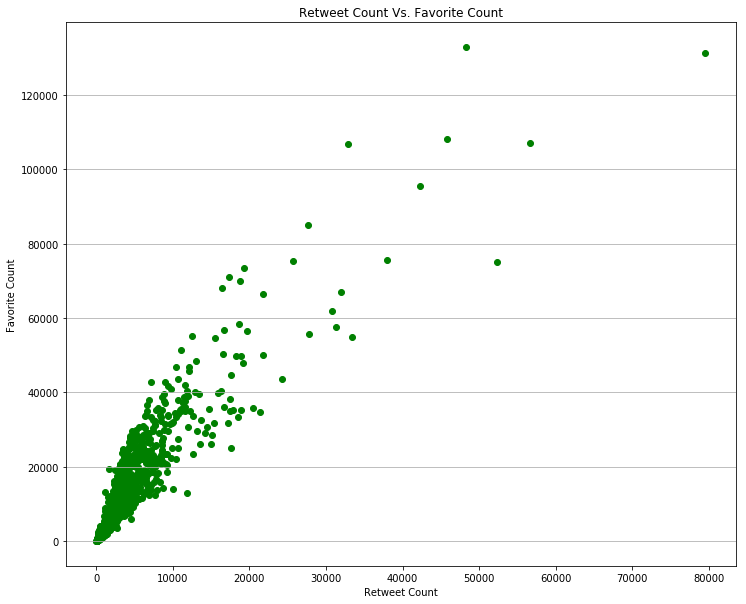

In [59]:
# Bar plot of retweet_count vs. favorite_count. This will be used for Insight 3 (above).
plt.figure(figsize=(12, 10))  # Set the size of the figure

plt.scatter(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count, color='green')  # Plot the bars

plt.title('Retweet Count Vs. Favorite Count')  # Add a title to the plot
plt.xlabel('Retweet Count')  # Add label to X-axis
plt.ylabel('Favorite Count')  # Add label to Y-axis

plt.grid(axis='y')  # Add grid lines on the Y-axis

plt.show()  # Display the plot